## K-최근접 이웃 (K-Nearest Neighbors, KNN) 

K-최근접 이웃 (KNN)**는 간단하지만 강력한 분류 및 회귀 알고리즘입니다. 

    이 알고리즘은 거리를 기반으로 예측을 수행하며, 

새로운 데이터 포인트가 주어졌을 때 가장 가까운 K개의 이웃을 찾아 다수결 투표를 통해 클래스를 예측합니다.

KNN 알고리즘 설명

훈련 데이터 준비:

알고리즘은 레이블이 있는 데이터 포인트를 사용하여 학습합니다.

거리 계산:

새로운 데이터 포인트가 주어지면, 훈련 데이터의 각 포인트와의 거리를 계산합니다.

일반적으로 **유클리드 거리 (Euclidean Distance)**를 사용합니다.

K개의 가장 가까운 이웃 선택:

거리 계산 결과를 기반으로 가장 가까운 K개의 이웃을 선택합니다.
    
다수결 투표:
    
선택된 이웃의 클래스 중 가장 많은 클래스가 새로운 데이터 포인트의 예측값이 됩니다.

### 1.붓꽃 데이터셋 (Iris Dataset)

In [ ]:
# 코드 설명
# 데이터 로드 및 표준화:
# load_iris() 함수를 사용하여 붓꽃 데이터셋을 로드하고, 특성을 표준화(StandardScaler())합니다.
# 데이터 분할:
# 데이터를 훈련 세트와 테스트 세트로 나눕니다 (train_test_split()).
# KNN 모델 생성 및 학습:
# KNeighborsClassifier 클래스를 사용하여 KNN 모델을 생성하고 학습합니다 (n_neighbors=k).
# 모델 평가:
# 테스트 데이터에서 예측을 수행하고, 정확도, 혼동 행렬, 분류 보고서를 출력합니다.
# K 값에 따른 정확도 시각화:
# K 값을 1부터 20까지 변경하며, 각 K 값에 대한 정확도를 그래프로 시각화합니다.


KNN 모델 정확도 (K=5): 1.0000

혼동 행렬:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

분류 보고서:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



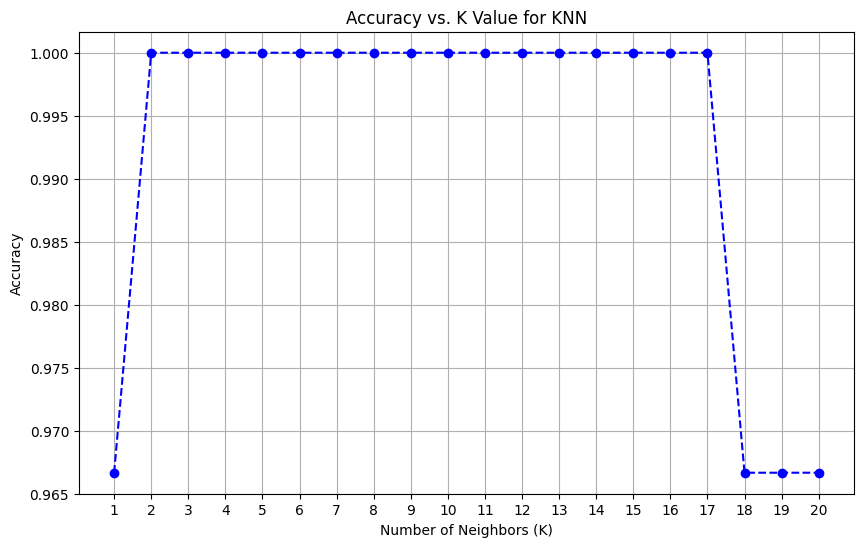

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. KNN 모델 생성 및 학습
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 5. 모델 평가
y_pred = knn.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN 모델 정확도 (K={k}): {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 6. 정확도 시각화 (K 값에 따른 정확도)
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


결과 해석

정확도:

K=5일 때, 테스트 세트에서 100% 정확도를 달성했습니다.
    
혼동 행렬:

모든 샘플이 정확하게 분류되었습니다 (오류가 없음).

K 값에 따른 정확도:

그래프를 통해 K 값이 증가함에 따라 정확도가 어떻게 변화하는지 확인할 수 있습니다.
    
일반적으로, K 값이 너무 작으면 모델이 과적합(overfitting)될 수 있고, K 값이 너무 크면 모델이 과소적합(underfitting)될 수 있습니다.

### 2. Kaggle 또는 Google TensorFlow : 신용카드 사기 탐지 데이터셋

In [ ]:
# 코드 설명
# 데이터 로드: creditcard.csv 파일을 로드합니다.
# 전처리:
# Class 컬럼에서 사기(1)와 정상(0) 거래의 비율을 확인합니다.
# 언더샘플링을 통해 불균형 문제를 완화할 수 있습니다.
# 스케일링: StandardScaler를 사용하여 데이터를 정규화합니다.
# 모델 학습 및 평가: KNN 모델을 학습하고 평가합니다.
# K 값 최적화: 에러율 그래프를 통해 최적의 K 값을 찾을 수 있습니다.

In [ ]:
# 데이터 셋 다운로드하여 경로 설정 함.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

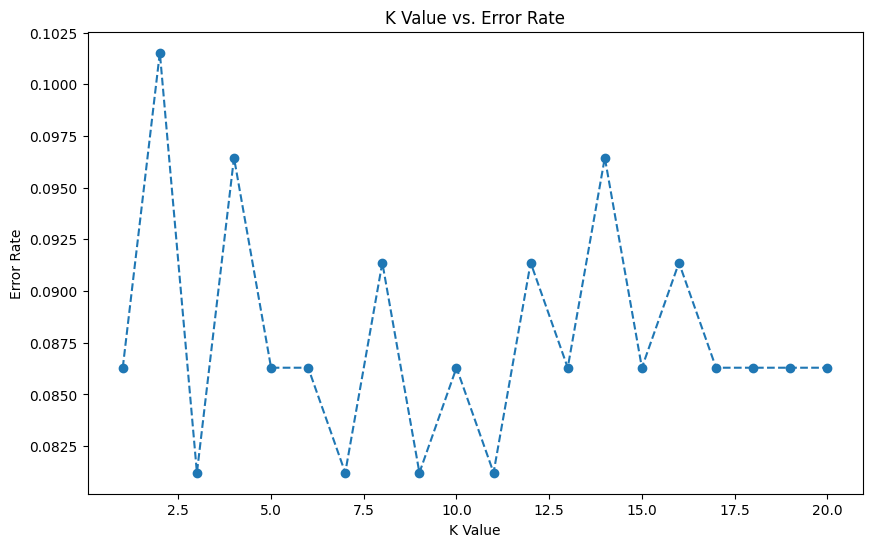

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 로드 (Kaggle의 creditcard.csv 파일 경로를 지정하세요)
df = pd.read_csv('creditcard.csv')

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df['Class'].value_counts())

# 3. 데이터 전처리
# 불균형 데이터 문제를 해결하기 위해 언더샘플링 수행 (선택 사항)
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(len(fraud), random_state=42)
balanced_df = pd.concat([fraud, non_fraud])

# 특징 변수와 타겟 변수 분리
X = balanced_df.drop(columns=['Class'])
y = balanced_df['Class']

# 데이터 스케일링 (Amount 컬럼은 특히 중요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. KNN 모델 생성 및 학습
k = 5  # K 값 설정
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 6. 모델 평가
y_pred = knn.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 분류 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. K 값 최적화 (옵션)
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = np.mean(y_pred_k != y_test)
    error_rates.append(error)

# 에러율 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--')
plt.title('K Value vs. Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()
